In [2]:
% matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import norm
from sklearn import preprocessing
import seaborn as sns

plt.rc("font", size=14)
plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) #filter deprecation warning
warnings.filterwarnings("ignore", category=FutureWarning) #filter future warning

In [18]:
#Upload dataset
df = pd.read_csv('cervical_cancer_risk_factors.csv') 
df = df.replace('?', np.nan)
df = df.convert_objects(convert_numeric=True)

#Determine number of missing values
df.isnull().sum().sum()

3622

In [19]:
# Fill missing continuous variables with mean values
df['Number of sexual partners'] = df['Number of sexual partners'].fillna(df['Number of sexual partners'].mean())
df['Number of sexual partners'] = df['Number of sexual partners'].fillna(df['Number of sexual partners'].mean())
df['First sexual intercourse'] = df['First sexual intercourse'].fillna(df['First sexual intercourse'].mean())
df['Num of pregnancies'] = df['Num of pregnancies'].fillna(df['Num of pregnancies'].mean())
df['Smokes'] = df['Smokes'].fillna(1)
df['Smokes (years)'] = df['Smokes (years)'].fillna(df['Smokes (years)'].mean())
df['Smokes (packs/year)'] = df['Smokes (packs/year)'].fillna(df['Smokes (packs/year)'].mean())
df['Hormonal Contraceptives'] = df['Hormonal Contraceptives'].fillna(1)
df['Hormonal Contraceptives (years)'] = df['Hormonal Contraceptives (years)'].fillna(df['Hormonal Contraceptives (years)'].mean())
df['IUD'] = df['IUD'].fillna(0) 
df['IUD (years)'] = df['IUD (years)'].fillna(0) 
df['STDs'] = df['STDs'].fillna(1)
df['STDs (number)'] = df['STDs (number)'].fillna(df['STDs (number)'].mean())
df['STDs:condylomatosis'] = df['STDs:condylomatosis'].fillna(df['STDs:condylomatosis'].mean())
df['STDs:cervical condylomatosis'] = df['STDs:cervical condylomatosis'].fillna(df['STDs:cervical condylomatosis'].mean())
df['STDs:vaginal condylomatosis'] = df['STDs:vaginal condylomatosis'].fillna(df['STDs:vaginal condylomatosis'].mean())
df['STDs:vulvo-perineal condylomatosis'] = df['STDs:vulvo-perineal condylomatosis'].fillna(df['STDs:vulvo-perineal condylomatosis'].mean())
df['STDs:syphilis'] = df['STDs:syphilis'].fillna(df['STDs:syphilis'].mean())
df['STDs:pelvic inflammatory disease'] = df['STDs:pelvic inflammatory disease'].fillna(df['STDs:pelvic inflammatory disease'].mean())
df['STDs:genital herpes'] = df['STDs:genital herpes'].fillna(df['STDs:genital herpes'].mean())
df['STDs:molluscum contagiosum'] = df['STDs:molluscum contagiosum'].fillna(df['STDs:molluscum contagiosum'].mean())
df['STDs:AIDS'] = df['STDs:AIDS'].fillna(df['STDs:AIDS'].mean())
df['STDs:HIV'] = df['STDs:HIV'].fillna(df['STDs:HIV'].mean())
df['STDs:Hepatitis B'] = df['STDs:Hepatitis B'].fillna(df['STDs:Hepatitis B'].mean())
df['STDs:HPV'] = df['STDs:HPV'].fillna(df['STDs:HPV'].mean())
df['STDs: Time since first diagnosis'] = df['STDs: Time since first diagnosis'].fillna(df['STDs: Time since first diagnosis'].mean())
df['STDs: Time since last diagnosis'] = df['STDs: Time since last diagnosis'].fillna(df['STDs: Time since last diagnosis'].mean())

# Check that all missing values have been filled
df.isnull().sum().sum()

0

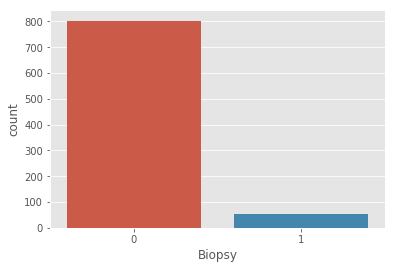

0    803
1     55
Name: Biopsy, dtype: int64

In [14]:
# Plot total negative and positive biopsies
sns.countplot(x='Biopsy', data=df)
plt.show()
df['Biopsy'].value_counts()

In [7]:
df.groupby('Biopsy').mean()

Age  Number of sexual partners  First sexual intercourse  \
Biopsy                                                                   
0       26.696139                   2.528258                 16.989996   
1       28.636364                   2.518684                 17.072727   

        Num of pregnancies    Smokes  Smokes (years)  Smokes (packs/year)  \
Biopsy                                                                      
0                 2.259654  0.155666        1.154464             0.438893   
1                 2.507799  0.200000        2.172485             0.661206   

        Hormonal Contraceptives  Hormonal Contraceptives (years)       IUD  \
Biopsy                                                                       
0                      0.688667                         2.183708  0.092154   
1                      0.654545                         3.318000  0.163636   

          ...     STDs: Number of diagnosis  STDs: Time since first diagnosis  \
Biopsy    ...                                                                   
0         ...                      0.079701                          6.153982   
1         ...                      0.200000                          5.949040   

        STDs: Time since last diagnosis  Dx:Cancer    Dx:CIN    Dx:HPV  \
Biopsy                                                                   
0                              5.825601   0.014944  0.007472  0.014944   
1                              5.689885   0.109091  0.054545  0.109091   

              Dx  Hinselmann  Schiller  Citology  
Biopsy                                            
0       0.021171    0.012453  0.032379  0.032379  
1       0.127273    0.454545  0.872727  0.327273  

[2 rows x 35 columns]

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
logreg = LogisticRegression() 

factors = df.drop('Biopsy', 1)
biopsy = np.array(df['Biopsy'])

X_train, X_test, y_train, y_test = train_test_split(factors, biopsy, test_size=0.3, random_state=3)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
logreg.score(X_test, y_test)

#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy of logistic regression classifier on test set: 0.95
[[232   7]
 [  6  13]]


In [23]:
from sklearn.metrics import confusion_matrix

iters = 1000
accuracies= list()
truePos = list()
falsePos = list()
falseNeg = list()
trueNeg = list()
sensitivity = list()
specificity = list()

for i in range(iters):
    X_train, X_test, y_train, y_test = train_test_split(factors, biopsy, test_size=0.3)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    accuracies.append(logreg.score(X_test, y_test))
    from sklearn.metrics import confusion_matrix          
    confusion_matrix = confusion_matrix(y_test, y_pred)
    TP = confusion_matrix[0,0]
    FP = confusion_matrix[0,1]
    FN = confusion_matrix[1,0]
    TN = confusion_matrix[1,1]
#     truePos.append(confusion_matrix[0,0])
#     falsePos.append(confusion_matrix[0,1])
#     falseNeg.append(confusion_matrix[1,0])                
#     trueNeg.append(confusion_matrix[1,1])
    sens = TP/(TP+FN)
    spec = TN/(TN+FP)
    sensitivity.append(sens)
    specificity.append(spec)

print(np.mean(accuracies))
# print(np.mean(truePos))
# print(np.mean(falsePos))
# print(np.mean(falseNeg))
# print(np.mean(trueNeg))
print(np.mean(sensitivity))
print(np.mean(specificity))

0.951899224806
0.969114625826
0.658848234599


Confusion matrix, without normalization
[[18  0]
 [ 1 14]]


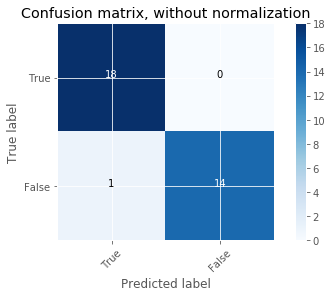

In [41]:
import itertools  

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes, rotation=45)
    plt.yticks(tick_marks,classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
from sklearn.metrics import confusion_matrix    
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

class_names =['True','False']

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')

# # Plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                       title='Normalized confusion matrix')

plt.show()


In [47]:
from sklearn.metrics import confusion_matrix

def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):

    columnwidth = max([len(x) for x in labels]+[5]) # 5 is value length
    empty_cell = () * columnwidth

    print ()     + empty_cell,
    for label in labels: 
        print ({0}s).format(columnwidth) % label,
    print
    # Print rows
    for i, label1 in enumerate(labels):
        print (    {0}s).format(columnwidth) % label1,
        for j in range(len(labels)): 
            cell = ({0}.1f).format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print cell,
        print

# first generate with specified labels
labels =['True','False']
cm = confusion_matrix(y_pred, y_test, labels)

# then print it in a pretty way
print_cm(cm, labels)

SyntaxError: invalid syntax (<ipython-input-47-bee4ce2d33f9>, line 10)

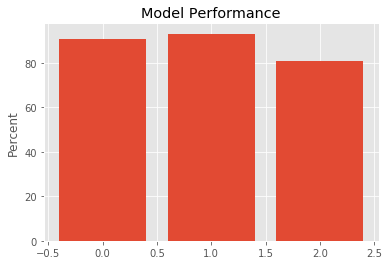

In [91]:
objects = ('Accuracy', 'Sensitivity', 'Specificity')
y_pos = np.arange(len(objects))
performance = [np.mean(accuracies)*100,np.mean(sensitivity)*100,np.mean(specificity)*100]
 
plt.bar(y_pos, performance, align='center')
# plt.xticks(y_pos, objects)
plt.ylabel('Percent')
plt.title('Model Performance')
 
plt.show()

In [35]:
# Create new dataframe containing all positives but fewer negatives
df_pos = df[df.Biopsy != 0] #remove all negative values from positives df
df_neg = df[df.Biopsy != 1] #remove all positive values from negatives df
df_neg55 = df_neg.sample(n=55) # randomly select 55 rows from negatives df
conc_df = pd.concat([df_pos, df_neg55]) 

In [36]:
factors = conc_df.drop('Biopsy', 1)
biopsy = np.array(conc_df['Biopsy'])

X_train, X_test, y_train, y_test = train_test_split(factors, biopsy, test_size=0.3, random_state=3)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
logreg.score(X_test, y_test)
#confusion matrix
from sklearn.metrics import confusion_matrix 
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

Accuracy of logistic regression classifier on test set: 0.97
[[18  0]
 [ 1 14]]


Confusion matrix, without normalization
[[18  0]
 [ 1 14]]


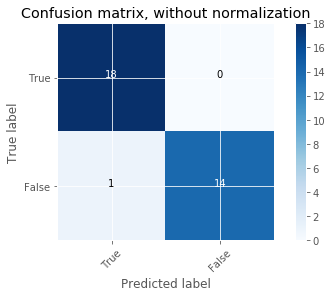

In [37]:
import itertools  

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
from sklearn.metrics import confusion_matrix    
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

class_names =['True','False']

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')

# # Plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                       title='Normalized confusion matrix')

plt.show()

In [32]:
factors = df.drop('Biopsy', 1)
biopsy = np.array(df['Biopsy'])

def test(factors,biopsy):
    X_train, X_test, y_train, y_test = train_test_split(factors, biopsy, test_size=0.3, random_state=3)
    logreg.fit(X_train, y_train)

    y_pred = logreg.predict(X_test)
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
    logreg.score(X_test, y_test)
    #confusion matrix
    from sklearn.metrics import confusion_matrix 
    confusion_matrix = confusion_matrix(y_test, y_pred)
    print(confusion_matrix)

    iters = 1000
    accuracies= list()
    sensitivity = list()
    specificity = list()

    for i in range(iters):
        X_train, X_test, y_train, y_test = train_test_split(factors, biopsy, test_size=0.2)
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)
        accuracies.append(logreg.score(X_test, y_test))

        from sklearn.metrics import confusion_matrix        
        confusion_matrix = confusion_matrix(y_test, y_pred)
        TP = confusion_matrix[0,0]
        FP = confusion_matrix[0,1]
        FN = confusion_matrix[1,0]
        TN = confusion_matrix[1,1]
        sens = TP/(TP+FN)
        spec = TN/(TN+FP)
        sensitivity.append(sens)
        specificity.append(spec)

    print(np.mean(accuracies))
    print(np.mean(sensitivity))
    print(np.mean(specificity))
    
test(factors,biopsy)

Accuracy of logistic regression classifier on test set: 0.95
[[232   7]
 [  6  13]]
0.952476744186
0.970607893394
0.650839922998
